In [0]:
!pip install pycryptodome

In [17]:
!pip install gmpy2

  Obtaining dependency information for gmpy2 from https://files.pythonhosted.org/packages/61/cd/86e47bccb3636389e29c4654a0e5ac52926d832897f2f64632639b63ffc1/gmpy2-2.2.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 435.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.2 MB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.2 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 0.9/1.2 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.1/1.2 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.8 MB/s eta 0:00:00


*F1*


Hexadecimal can be used in such a way to represent ASCII strings. First each letter is converted to an ordinal number according to the ASCII table (as in the previous challenge). Then the decimal numbers are converted to base-16 numbers, otherwise known as hexadecimal. The numbers can be combined together, into one long hex string.

Included below is a flag encoded as a hex string. Decode this back into bytes to get the flag.
```

63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974
685f6865785f737472696e67735f615f6c6f747d
```

In [1]:
# The hex string
hex_string = "63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d"

# Method 1: Using bytes.fromhex()
decoded = bytes.fromhex(hex_string).decode('ascii')
print(decoded)

# Method 2: Alternative way using int() and chr()
decoded2 = ""
for i in range(0, len(hex_string), 2):
    hex_pair = hex_string[i:i+2]
    decimal = int(hex_pair, 16)
    decoded2 += chr(decimal)
print(decoded2)


crypto{You_will_be_working_with_hex_strings_a_lot}
crypto{You_will_be_working_with_hex_strings_a_lot}


_______________________________________________________________________________________

*F2*


Another common encoding scheme is Base64, which allows us to represent binary data as an ASCII string using an alphabet of 64 characters. One character of a Base64 string encodes 6 binary digits (bits), and so 4 characters of Base64 encode three 8-bit bytes.

Base64 is most commonly used online, so binary data such as images can be easily included into HTML or CSS files.

Take the below hex string, decode it into bytes and then encode it into Base64.

```
72bca9b68fc16ac7beeb8f849dca
1d8a783e8acf9679bf9269f7bf
```

 In Python, after importing the base64 module with import base64, you can use the base64.b64encode() function. Remember to decode the hex first as the challenge description states.

In [2]:
import base64

# The hex string
hex_string = "72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf"

# Step 1: Convert hex to bytes
bytes_data = bytes.fromhex(hex_string)

# Step 2: Encode bytes to Base64
base64_encoded = base64.b64encode(bytes_data).decode()

print(base64_encoded)


crypto/Base+64+Encoding+is+Web+Safe/


_________________________________________________
*F3*

Cryptosystems like RSA works on numbers, but messages are made up of characters. How should we convert our messages into numbers so that mathematical operations can be applied?

The most common way is to take the ordinal bytes of the message, convert them into hexadecimal, and concatenate. This can be interpreted as a base-16/hexadecimal number, and also represented in base-10/decimal.

To illustrate:

message: HELLO
ascii bytes: [72, 69, 76, 76, 79]

hex bytes: [0x48, 0x45, 0x4c, 0x4c, 0x4f]

base-16: 0x48454c4c4f

base-10: 310400273487

 Python's PyCryptodome library implements this with the methods bytes_to_long() and long_to_bytes(). You will first have to install PyCryptodome and import it with from Crypto.Util.number import 


Convert the following integer back into a message:
```
11515195063862318899931685488813747
39577551628728968263649996528271463
7259206269
```

In [3]:
# Original message
message = "HELLO"

# Convert to ASCII bytes
ascii_bytes = [ord(c) for c in message]
print(f"ASCII bytes: {ascii_bytes}")

# Convert to hex bytes
hex_bytes = [hex(ord(c)) for c in message]
print(f"Hex bytes: {hex_bytes}")

# Create base-16 (hex) representation by concatenating
hex_string = "0x" + "".join([hex(ord(c))[2:] for c in message])
print(f"Base-16: {hex_string}")

# Convert to base-10 (decimal)
decimal = int(hex_string, 16)
print(f"Base-10: {decimal}")

# To convert back from decimal to text:
def decimal_to_text(decimal_num):
    hex_str = hex(decimal_num)[2:]  # Remove '0x' prefix
    # Ensure even length
    if len(hex_str) % 2 != 0:
        hex_str = '0' + hex_str
    # Convert back to bytes and then to string
    return bytes.fromhex(hex_str).decode('ascii')

# Test the conversion back
original = decimal_to_text(decimal)
print(f"Back to text: {original}")


ASCII bytes: [72, 69, 76, 76, 79]
Hex bytes: ['0x48', '0x45', '0x4c', '0x4c', '0x4f']
Base-16: 0x48454c4c4f
Base-10: 310400273487
Back to text: HELLO


In [5]:
from Crypto.Util.number import bytes_to_long, long_to_bytes

# Original message
message = "HELLO"

# Method 1: Using PyCryptodome (easiest way)
message_bytes = message.encode('ascii')
number = bytes_to_long(message_bytes)
print(f"Using PyCryptodome bytes_to_long(): {number}")

# Converting back to text
recovered = long_to_bytes(number).decode('ascii')
print(f"Recovered message: {recovered}")



Using PyCryptodome bytes_to_long(): 310400273487
Recovered message: HELLO


In [7]:
from Crypto.Util.number import long_to_bytes

# The given number
number = 11515195063862318899931685488813747395775516287289682636499965282714637259206269

# Method 1: Using PyCryptodome (easier way)
message = long_to_bytes(number).decode()
print(f"Using PyCryptodome: {message}")

# Method 2: Manual conversion
def decimal_to_text(decimal_num):
    # Convert decimal to hex, remove '0x' prefix
    hex_str = hex(decimal_num)[2:]
    # Ensure even length
    if len(hex_str) % 2 != 0:
        hex_str = '0' + hex_str
    # Convert hex to bytes and then to string
    return bytes.fromhex(hex_str).decode('ascii')

manual_message = decimal_to_text(number)
print(f"Using manual conversion: {manual_message}")


Using PyCryptodome: crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}
Using manual conversion: crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}


___________________________________________________________________
*F4*



XOR is a bitwise operator which returns 0 if the bits are the same, and 1 otherwise. In textbooks the XOR operator is denoted by $\oplus$, but in most challenges and programming languages you will see the caret used instead.

A	B	A $\oplus$ B

0	0	0

0	1	1

1	0	1

1	1	0

For longer binary numbers we XOR bit by bit: $0110 \oplus 1010 = 1100$. We can XOR integers by first converting the integer from decimal to binary. We can XOR strings by first converting each character to the integer representing the Unicode character.

Given the string label, XOR each character with the integer 13. Convert these integers back to a string and submit the flag as crypto\{new\_string\}.

The Python pwntools library has a convenient xor() function that can XOR together data of different types and lengths. But first, you may want to implement your own function to solve this.

In [9]:
def xor_with_key(text, key):
    """
    XOR each character in text with the given key value
    Args:
        text (str): Input text to XOR
        key (int): Integer key to XOR with
    Returns:
        str: XORed result
    """
    return ''.join(chr(ord(c) ^ key) for c in text)

def make_flag(text):
    return f"crypto{{{text}}}"

# Solve the original problem (label XOR 13)
original_text = "label"
key = 13

result = xor_with_key(original_text, key)
flag = make_flag(result)

print(f"Original text: {original_text}")
print(f"XORed with {key}: {result}")
print(f"Flag: {flag}")



# Verify reversibility
reversed_text = xor_with_key(result, key)
print(f"XORing result again with {key}: {reversed_text}")


Original text: label
XORed with 13: aloha
Flag: crypto{aloha}
XORing result again with 13: label


In [10]:
# Demonstrate the process
print("\nStep by step process:")
for char in original_text:
    original_num = ord(char)
    xored = original_num ^ key
    new_char = chr(xored)
    print(f"Character: {char}")
    print(f"ASCII value: {original_num}")
    print(f"XORed with {key}: {xored}")
    print(f"New character: {new_char}")
    print()


Step by step process:
Character: l
ASCII value: 108
XORed with 13: 97
New character: a

Character: a
ASCII value: 97
XORed with 13: 108
New character: l

Character: b
ASCII value: 98
XORed with 13: 111
New character: o

Character: e
ASCII value: 101
XORed with 13: 104
New character: h

Character: l
ASCII value: 108
XORed with 13: 97
New character: a



In [18]:
# Install pwntools using pip
#!pip install pwntools;

from pwn import *

text = "label"
result = xor(text, 13)
flag = f"crypto{{{result.decode()}}}"
print(flag)


crypto{aloha}


___________________________________________________________________
*F5*



In the last challenge, you saw how XOR worked at the level of bits. In this one, we're going to cover the properties of the XOR operation and then use them to undo a chain of operations that have encrypted a flag. Gaining an intuition for how this works will help greatly when you come to attacking real cryptosystems later, especially in the block ciphers category.

There are four main properties we should consider when we solve challenges using the XOR operator

Commutative: $A \oplus B = B \oplus A$
Associative: $A \oplus (B \oplus C) = (A \oplus B) \oplus C$
Identity: $A \oplus 0 = A$
Self-Inverse: $A \oplus A = 0$

Let's break this down. Commutative means that the order of the XOR operations is not important. Associative means that a chain of operations can be carried out without order (we do not need to worry about brackets). The identity is 0, so XOR with 0 "does nothing", and lastly something XOR'd with itself returns zero.

Let's put this into practice! Below is a series of outputs where three random keys have been XOR'd together and with the flag. Use the above properties to undo the encryption in the final line to obtain the flag.

```
KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
KEY2 ^ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e
KEY2 ^ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1
FLAG ^ KEY1 ^ KEY3 ^ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf
```

Before you XOR these objects, be sure to decode from hex to bytes.

In [23]:
from Crypto.Util.number import *


# Convert hex strings to integers
KEY1 = int('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313', 16)
KEY2_XOR_KEY1 = int('37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e', 16)
KEY2_XOR_KEY3 = int('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1', 16)
FLAG_XOR_ALL = int('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf', 16)

# Using the properties:
# 1. From KEY2 ^ KEY1 we can get KEY2 by XORing both sides with KEY1
# 2. From KEY2 ^ KEY3 we can get KEY3 by XORing with KEY2
# 3. Then we can solve for FLAG

# Get KEY2 using KEY2 ^ KEY1
KEY2 = KEY2_XOR_KEY1 ^ KEY1  

# Get KEY3 using KEY2 ^ KEY3
KEY3 = KEY2_XOR_KEY3 ^ KEY2

# The encrypted flag is FLAG ^ KEY1 ^ KEY3 ^ KEY2
# To get FLAG, XOR with the same keys again
FLAG = FLAG_XOR_ALL ^ KEY1 ^ KEY3 ^ KEY2

# Convert the result back to bytes and decode
flag = long_to_bytes(FLAG)
print(flag.decode())


crypto{x0r_i5_ass0c1at1v3}


In [26]:
from pwn import xor
k1=bytes.fromhex('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313')
k2_3=bytes.fromhex('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1')
flag=bytes.fromhex('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf')
print(xor(k1,k2_3,flag)) 

b'crypto{x0r_i5_ass0c1at1v3}'


_______________________________________________________________

*F6*

I've hidden some data using XOR with a single byte, but that byte is a secret. Don't forget to decode from hex first.
```
73626960647f6b206821204f
21254f7d694f762466206562
2127234f726927756d
```

In [27]:
def try_single_byte_xor(hex_string):
    # Convert hex to bytes
    ciphertext = bytes.fromhex(hex_string)
    
    # Try every possible byte value (0-255)
    for key in range(256):
        # XOR each byte with the key
        result = ''
        valid = True
        
        # Create the decoded text
        decoded = ''.join(chr(b ^ key) for b in ciphertext)
        
        # Check if the result contains printable ASCII
        if all(32 <= ord(c) <= 126 for c in decoded):
            print(f"Key {key}: {decoded}")

# The encrypted hex string
hex_string = "73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d"

try_single_byte_xor(hex_string)


Key 1: rchae~j!i !N $N|hNw%g!dc &"Nsh&tl
Key 3: pajcg|h#k"#L"&L~jLu'e#fa"$ Lqj$vn
Key 4: wfmd`{o$l%$K%!KymKr b$af%#'Kvm#qi
Key 5: vgleazn%m$%J$ JxlJs!c%`g$"&Jwl"ph
Key 6: udofbym&n'&I'#I{oIp"`&cd'!%Ito!sk
Key 7: tengcxl'o&'H&"HznHq#a'be& $Hun rj
Key 8: {jahlwc(`)(G)-GuaG~,n(mj)/+Gza/}e
Key 11: xibkot`+c*+D*.DvbD}/m+ni*,(Dyb,~f
Key 14: }lgnjqe.f/.A/+AsgAx*h.kl/)-A|g){c
Key 15: |mfokpd/g./@.*@rf@y+i/jm.(,@}f(zb
Key 16: crypto{0x10_15_my_f4v0ur173_by7e}
Key 17: bsxqunz1y01^04^lx^g5w1ts062^cx6d|
Key 19: `qzswlx3{23\26\nz\e7u3vq240\az4f~
Key 21: fw|uqj~5}45Z40Zh|Zc1s5pw426Zg|2`x
Key 24: kzqx|gs8p98W9=WeqWn<~8}z9?;Wjq?mu
Key 28: o~u|xcw<t=<S=9SauSj8z<y~=;?Snu;iq
Key 30: m|w~zau>v?>Q?;QcwQh:x>{|?9=Qlw9ks


```
Key 16: crypto{0x10_15_my_f4v0ur173_by7e} is the answer
```

In [29]:
from pwn import xor
# Imports the xor function from the pwntools library, which makes XOR operations easy

cipher = bytes.fromhex("73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d")
# 1. Takes the hex string (the encrypted message)
# 2. bytes.fromhex() converts the hex string into bytes for processing
# For example: '73' becomes the byte value 0x73

for i in range(256):
    # Tries every possible single byte value (0-255)
    # Since a byte can be any value from 0 to 255, we try each one
    
    result = xor(cipher, i).decode()
    # 1. xor(cipher, i) - XORs each byte of the cipher with the value i
    # 2. .decode() - converts the resulting bytes back to a readable string
    
    if result.startswith('crypto{'):
        # Checks if the decoded result starts with 'crypto{'
        # This is how we know we found the correct key
        
        print(f"Found flag: {result}")
        # Prints the flag when found
        
        break
        # Exits the loop once we find the correct result



Found flag: crypto{0x10_15_my_f4v0ur173_by7e}


________________________________________________________________________________
*F7*


I've encrypted the flag with my secret key, you'll never be able to guess it.

Remember the flag format and how it might help you in this challenge!

```
0e0b213f26041e48
0b26217f27342e175
d0e070a3c5b103e25
26217f27342e175d0e
077e263451150104
```

In [34]:
from pwn import xor

# Convert hex to bytes
cipher = bytes.fromhex('0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104')

# Known start of the flag
known = b'crypto{'

# Find the key by XORing the first 7 bytes with 'crypto{'
key = xor(cipher[:7], known)
print(f"Key found: {key.decode()}")

# Try extending the key (it's probably repeating)
key = key.decode()
while len(key) < len(cipher):
    key += key



Key found: myXORke


In [31]:
from pwn import xor

cipher = bytes.fromhex('0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104')
key = b'myXORkey'  # We already know the key
flag = xor(cipher, key * (len(cipher)//len(key) + 1))
print(f"Flag: {flag.decode()}")


Flag: crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}VDsTC}


____________________________________________________________________________________________
*F8*

calculate 
gcd
⁡
(
a
,
b
)
gcd(a,b) for 
a=66528,
b=52920
and enter it below.


In [36]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a


# Calculate the actual challenge
a = 66528
b = 52920
result = gcd(a, b)
print(f"GCD of {a} and {b} is: {result}")

GCD of 12 and 8 is: 4
GCD of 66528 and 52920 is: 1512


___________________________________________________________

*F9*

In [38]:
def extended_gcd(a, b):
    if a == 0:
        return b, 0, 1
    else:
        gcd, x, y = extended_gcd(b % a, a)
        return gcd, y - (b//a) * x, x

# The primes
p = 26513
q = 32321

# Calculate GCD and coefficients
gcd, u, v = extended_gcd(p, q)

print(f"GCD: {gcd}")
print(f"u: {u}")
print(f"v: {v}")
print(f"Verification: {p*u + q*v}")  # Should equal GCD
print(f"Flag is the lower of u ({u}) and v ({v})")


GCD: 1
u: 10245
v: -8404
Verification: 1
Flag is the lower of u (10245) and v (-8404)


_______________________________________________________
*F10*


$11 \equiv x \pmod{6}$

$8146798528947 \equiv y \pmod{17}$

The solution is the smaller of the two integers, 
(x,y) you obtained after reducing by the modulus.

In [41]:
# For x ≡ 11 (mod 6)
x = 11 % 6

# For y ≡ 8146798528947 (mod 17)
y = 8146798528947 % 17

print(f"x = {x}")
print(f"y = {y}")



x = 5
y = 4


______________________________________________________________________
*F11*


Let $p = 17$. Calculate $3^{17} \pmod{17}$. Now do the same but with $5^{17} \pmod{17}$.

What would you expect to get for $7^{16} \pmod{17}$? Try calculating that.

This interesting fact is known as Fermat's little theorem. We'll be needing this (and its generalisations) when we look at RSA cryptography.

Now take the prime $p = 65537$. Calculate $273246787654^{65536} \pmod{65537}$.

In [42]:
# First part with p = 17
p = 17

# Calculate 3^17 mod 17
result1 = pow(3, 17, 17)
print(f"3^17 mod 17 = {result1}")  # Should be 3

# Calculate 5^17 mod 17
result2 = pow(5, 17, 17)
print(f"5^17 mod 17 = {result2}")  # Should be 5

# Calculate 7^16 mod 17
result3 = pow(7, 16, 17)
print(f"7^16 mod 17 = {result3}")  # Should be 1

# Final calculation with p = 65537
p = 65537
result4 = pow(273246787654, 65536, 65537)
print(f"273246787654^65536 mod 65537 = {result4}")  # Should be 1


3^17 mod 17 = 3
5^17 mod 17 = 5
7^16 mod 17 = 1
273246787654^65536 mod 65537 = 1


In [45]:
a=(3**17)%17
b=(5**17)%17
c=(7**16)%17
d=(273246787654**65536)%65537
print(a,b,c,d)

3 5 1 1


In [56]:
def is_prime(n):
    return n > 1 and all(n % i != 0 for i in range(2, int(n**0.5) + 1))

def check_fermat(base, exponent, p):
    return 1 if is_prime(p) and base % p != 0 and exponent == p-1 else "Conditions not met"

# Test
print(check_fermat(273246787654, 65536, 65537))


1


______________________________________________________________

*F12*


As we've seen, we can work within a finite field $\mathbb{F}_p$, adding and multiplying elements, and always obtain another element of the field.

For all elements $g$ in the field, there exists a unique integer $d$ such that $g \cdot d \equiv 1 \pmod{p}$

This is the multiplicative inverse of $g$

Example: $7 \cdot 8 = 56 \equiv 1 \pmod{11}$

What is the inverse element: $d = 3^{-1}$ such that $ 3 \cdot d \equiv 1 \pmod{13}$ ?


In [4]:
def pow_mod(base, exponent, modulus):
    result = 1
    base = base % modulus
    
    while exponent > 0:
        # If exponent is odd, multiply base with result
        if exponent & 1:
            result = (result * base) % modulus
        # Exponent = exponent/2
        exponent = exponent >> 1
        # Base = base^2
        base = (base * base) % modulus
    
    return result

# Find 3^(-1) mod 13 using Fermat's Little Theorem
base = 3
prime = 13
inverse = pow_mod(base, prime-2, prime)

print(f"The multiplicative inverse of {base} modulo {prime} is: {inverse}")
# Verify the result
print(f"Verification: ({base} * {inverse}) mod {prime} = {(base * inverse) % prime}")


The multiplicative inverse of 3 modulo 13 is: 9
Verification: (3 * 9) mod 13 = 1


___________________________________________________
*F13*



We've looked at multiplication and division in modular arithmetic, but what does it mean to take the square root modulo an integer?

For the following discussion, let's work modulo $p = 29$. We can take the integer $a = 11$ and calculate $a^2 = 5 \mod 29$.

As $a = 11$, $a^2 = 5$, we say the square root of $5$ is $11$.

This feels good, but now let's think about the square root of $18$. From the above, we know we need to find some integer $a$ such that $a^2 = 18$.

Your first idea might be to start with $a = 1$ and loop to $a = p - 1$. In this discussion $p$ isn't too large and we can quickly check all options.

Have a go, try coding this and see what you find. If you've coded it right, you'll find that for all $a \in F_p^*$, you never find an $a$ such that $a^2 = 18$.

What we are seeing, is that for the elements of $F_p^*$, not every element has a square root. In fact, what we find is that for roughly one half of the elements of $F_p^*$, there is no square root.

We say that an integer $x$ is a Quadratic Residue if there exists an $a$ such that $a^2 \equiv x \mod p$. If there is no such solution, then the integer is a Quadratic Non-Residue.


In other words, $x$ is a quadratic residue when it is possible to take the square root of $x$ modulo an integer $p$.

In the below list there are two non-quadratic residues and one quadratic residue.

Find the quadratic residue and then calculate its square root. Of the two possible roots, submit the smaller one as the flag.

If $a^2 = x$ then $(-a)^2 = x$. So if $x$ is a quadratic residue in some finite field, then there are always two solutions for $a$.


$p = 29$

$integers = [14, 6, 11]$

In [6]:
def find_squares(p):
    squares = set()
    for i in range(p):
        squares.add((i * i) % p)
    return squares

def find_roots(n, p):
    roots = []
    for i in range(p):
        if (i * i) % p == n:
            roots.append(i)
    return roots

p = 29
ints = [14, 6, 11]

# Find all quadratic residues modulo p
squares = find_squares(p)

print(f"Quadratic residues modulo {p}: {sorted(squares)}")

# Check each number
for x in ints:
    if x in squares:
        print(f"\n{x} is a quadratic residue")
        roots = find_roots(x, p)
        print(f"Its square roots are: {roots}")
    else:
        print(f"\n{x} is not a quadratic residue")


Quadratic residues modulo 29: [0, 1, 4, 5, 6, 7, 9, 13, 16, 20, 22, 23, 24, 25, 28]

14 is not a quadratic residue

6 is a quadratic residue
Its square roots are: [8, 21]

11 is not a quadratic residue


```
Note,$21 \equiv -8$ essentially mod 29
```

________________________________________________________________________________________________

*F14*
We've looked at multiplication and division in modular arithmetic, but what does it mean to take the square root modulo an integer?

In Quadratic Residues we learnt what it means to take the square root modulo an integer. We also saw that taking a root isn't always possible.

In the previous case when $p = 29$, even the simplest method of calculating the square root was fast enough, but as $p$ gets larger, this method becomes wildly unreasonable.

Lucky for us, we have a way to check whether an integer is a quadratic residue with a single calculation thanks to Legendre. In the following, we will assume we are working modulo a prime $p$.

Before looking at Legendre's symbol, let's take a brief detour to see an interesting property of quadratic (non-)residues.

Quadratic Residue * Quadratic Residue = Quadratic Residue
Quadratic Residue * Quadratic Non-residue = Quadratic Non-residue
Quadratic Non-residue * Quadratic Non-residue = Quadratic Residue

Want an easy way to remember this? Replace "Quadratic Residue" with $+1$ and "Quadratic Non-residue" with $-1$, all three results are the same!


So what's the trick? The Legendre Symbol gives an efficient way to determine whether an integer is a quadratic residue modulo an odd prime $p$.

Legendre's Symbol: $\left(\frac{a}{p}\right) \equiv a^{(p-1)/2} \mod p$ obeys:

$\left(\frac{a}{p}\right) = 1$ if $a$ is a quadratic residue and $a \not\equiv 0 \mod p$
$\left(\frac{a}{p}\right) = -1$ if $a$ is a quadratic non-residue $\mod p$
$\left(\frac{a}{p}\right) = 0$ if $a \equiv 0 \mod p$

Which means given any integer $a$, calculating $a^{(p-1)/2} \mod p$ is enough to determine if $a$ is a quadratic residue.

Now for the flag. Given the following 1024 bit prime and 10 integers, find the quadratic residue and then calculate its square root; the square root is your flag. Of the two possible roots, submit the larger one as your answer.

So Legendre's symbol tells us which integer is a quadratic residue, but how do we find the square root?! The prime supplied obeys $p \equiv 3 \mod 4$, which allows us easily compute the square root. The answer is online, but you can figure it out yourself if you think about Fermat's little theorem.

p = 101524035174539890485408575671085261788758965189060164484385690801466167356667036677932998889725476582421738788500738738503134356158197247473850273565349249573867251280253564698939768700489401960767007716413932851838937641880157263936985954881657889497583485535527613578457628399173971810541670838543309159139

ints = [25081841204695904475894082974192007718642931811040324543182130088804239047149283334700530600468528298920930150221871666297194395061462592781551275161695411167049544771049769000895119729307495913024360169904315078028798025169985966732789207320203861858234048872508633514498384390497048416012928086480326832803, 45471765180330439060504647480621449634904192839383897212809808339619841633826534856109999027962620381874878086991125854247108359699799913776917227058286090426484548349388138935504299609200377899052716663351188664096302672712078508601311725863678223874157861163196340391008634419348573975841578359355931590555, 17364140182001694956465593533200623738590196990236340894554145562517924989208719245429557645254953527658049246737589538280332010533027062477684237933221198639948938784244510469138826808187365678322547992099715229218615475923754896960363138890331502811292427146595752813297603265829581292183917027983351121325, 14388109104985808487337749876058284426747816961971581447380608277949200244660381570568531129775053684256071819837294436069133592772543582735985855506250660938574234958754211349215293281645205354069970790155237033436065434572020652955666855773232074749487007626050323967496732359278657193580493324467258802863, 4379499308310772821004090447650785095356643590411706358119239166662089428685562719233435615196994728767593223519226235062647670077854687031681041462632566890129595506430188602238753450337691441293042716909901692570971955078924699306873191983953501093343423248482960643055943413031768521782634679536276233318, 85256449776780591202928235662805033201684571648990042997557084658000067050672130152734911919581661523957075992761662315262685030115255938352540032297113615687815976039390537716707854569980516690246592112936796917504034711418465442893323439490171095447109457355598873230115172636184525449905022174536414781771, 50576597458517451578431293746926099486388286246142012476814190030935689430726042810458344828563913001012415702876199708216875020997112089693759638454900092580746638631062117961876611545851157613835724635005253792316142379239047654392970415343694657580353333217547079551304961116837545648785312490665576832987, 96868738830341112368094632337476840272563704408573054404213766500407517251810212494515862176356916912627172280446141202661640191237336568731069327906100896178776245311689857997012187599140875912026589672629935267844696976980890380730867520071059572350667913710344648377601017758188404474812654737363275994871, 4881261656846638800623549662943393234361061827128610120046315649707078244180313661063004390750821317096754282796876479695558644108492317407662131441224257537276274962372021273583478509416358764706098471849536036184924640593888902859441388472856822541452041181244337124767666161645827145408781917658423571721, 18237936726367556664171427575475596460727369368246286138804284742124256700367133250078608537129877968287885457417957868580553371999414227484737603688992620953200143688061024092623556471053006464123205133894607923801371986027458274343737860395496260538663183193877539815179246700525865152165600985105257601565]

In [15]:
# Given prime p
p = 101524035174539890485408575671085261788758965189060164484385690801466167356667036677932998889725476582421738788500738738503134356158197247473850273565349249573867251280253564698939768700489401960767007716413932851838937641880157263936985954881657889497583485535527613578457628399173971810541670838543309159139

# Given integers
ints = [
    25081841204695904475894082974192007718642931811040324543182130088804239047149283334700530600468528298920930150221871666297194395061462592781551275161695411167049544771049769000895119729307495913024360169904315078028798025169985966732789207320203861858234048872508633514498384390497048416012928086480326832803,
    45471765180330439060504647480621449634904192839383897212809808339619841633826534856109999027962620381874878086991125854247108359699799913776917227058286090426484548349388138935504299609200377899052716663351188664096302672712078508601311725863678223874157861163196340391008634419348573975841578359355931590555,
    17364140182001694956465593533200623738590196990236340894554145562517924989208719245429557645254953527658049246737589538280332010533027062477684237933221198639948938784244510469138826808187365678322547992099715229218615475923754896960363138890331502811292427146595752813297603265829581292183917027983351121325,
    14388109104985808487337749876058284426747816961971581447380608277949200244660381570568531129775053684256071819837294436069133592772543582735985855506250660938574234958754211349215293281645205354069970790155237033436065434572020652955666855773232074749487007626050323967496732359278657193580493324467258802863,
    4379499308310772821004090447650785095356643590411706358119239166662089428685562719233435615196994728767593223519226235062647670077854687031681041462632566890129595506430188602238753450337691441293042716909901692570971955078924699306873191983953501093343423248482960643055943413031768521782634679536276233318,
    85256449776780591202928235662805033201684571648990042997557084658000067050672130152734911919581661523957075992761662315262685030115255938352540032297113615687815976039390537716707854569980516690246592112936796917504034711418465442893323439490171095447109457355598873230115172636184525449905022174536414781771,
    50576597458517451578431293746926099486388286246142012476814190030935689430726042810458344828563913001012415702876199708216875020997112089693759638454900092580746638631062117961876611545851157613835724635005253792316142379239047654392970415343694657580353333217547079551304961116837545648785312490665576832987,
    96868738830341112368094632337476840272563704408573054404213766500407517251810212494515862176356916912627172280446141202661640191237336568731069327906100896178776245311689857997012187599140875912026589672629935267844696976980890380730867520071059572350667913710344648377601017758188404474812654737363275994871,
    4881261656846638800623549662943393234361061827128610120046315649707078244180313661063004390750821317096754282796876479695558644108492317407662131441224257537276274962372021273583478509416358764706098471849536036184924640593888902859441388472856822541452041181244337124767666161645827145408781917658423571721,
    18237936726367556664171427575475596460727369368246286138804284742124256700367133250078608537129877968287885457417957868580553371999414227484737603688992620953200143688061024092623556471053006464123205133894607923801371986027458274343737860395496260538663183193877539815179246700525865152165600985105257601565
]

# Function to compute Legendre symbol (a/p)
def legendre_symbol(a, p):
    return pow(a, (p - 1) // 2, p)

# Find the quadratic residue
quadratic_residue = None
for a in ints:
    if legendre_symbol(a, p) == 1:
        quadratic_residue = a
        break

print(quadratic_residue)


85256449776780591202928235662805033201684571648990042997557084658000067050672130152734911919581661523957075992761662315262685030115255938352540032297113615687815976039390537716707854569980516690246592112936796917504034711418465442893323439490171095447109457355598873230115172636184525449905022174536414781771


In [16]:
legendre_symbol(quadratic_residue,p)

1

In [25]:
p%4
#for using (p+1)/4 exponentiation if p is of the form 4k+1 for some natural number k

3

In [24]:
# Compute the square root using (p+1)/4 exponentiation since p is of the form 4k+1 for some natural number k
sqrt_residue = pow(quadratic_residue, (p + 1) // 4, p)

# Since modular square roots have two solutions, we ensure we return the larger one
larger_root = max(sqrt_residue, p - sqrt_residue)
print(larger_root)


if (larger_root**2)%p == quadratic_residue%p:
    print("root of the quadratic residue verified")


93291799125366706806545638475797430512104976066103610269938025709952247020061090804870186195285998727680200979853848718589126765742550855954805290253592144209552123062161458584575060939481368210688629862036958857604707468372384278049741369153506182660264876115428251983455344219194133033177700490981696141526
root of the quadratic residue verified


__________________________________________________________________________________________
 *F15*



 

In Legendre Symbol we introduced a fast way to determine whether a number is a square root modulo a prime. We can go further: there are algorithms for efficiently calculating such roots. The best one in practice is called Tonelli-Shanks, which gets its funny name from the fact that it was first described by an Italian in the 19th century and rediscovered independently by Daniel Shanks in the 1970s.

All primes that aren't 2 are of the form $p \equiv 1 \mod 4$ or $p \equiv 3 \mod 4$, since all odd numbers obey these congruences. As the previous challenge hinted, in the $p \equiv 3 \mod 4$ case, a really simple formula for computing square roots can be derived directly from Fermat's little theorem. That leaves us still with the $p \equiv 1 \mod 4$ case, so a more general algorithm is required.

In a congruence of the form $r^2 \equiv a \mod p$, Tonelli-Shanks calculates $r$.

Tonelli-Shanks doesn't work for composite (non-prime) moduli. Finding square roots modulo composites is computationally equivalent to integer factorization - that is, it's a hard problem.


The main use-case for this algorithm is finding elliptic curve coordinates. Its operation is somewhat complex so we're not going to discuss the details, however, implementations are easy to find and Sage has one built-in.

Find the square root of $a$ modulo the 2048-bit prime $p$. Give the smaller of the two roots as your answer.

a = 8479994658316772151941616510097127087554541274812435112009425778595495359700244470400642403747058566807127814165396640215844192327900454116257979487432016769329970767046735091249898678088061634796559556704959846424131820416048436501387617211770124292793308079214153179977624440438616958575058361193975686620046439877308339989295604537867493683872778843921771307305602776398786978353866231661453376056771972069776398999013769588936194859344941268223184197231368887060609212875507518936172060702209557124430477137421847130682601666968691651447236917018634902407704797328509461854842432015009878011354022108661461024768
p = 30531851861994333252675935111487950694414332763909083514133769861350960895076504687261369815735742549428789138300843082086550059082835141454526618160634109969195486322015775943030060449557090064811940139431735209185996454739163555910726493597222646855506445602953689527405362207926990442391705014604777038685880527537489845359101552442292804398472642356609304810680731556542002301547846635101455995732584071355903010856718680732337369128498655255277003643669031694516851390505923416710601212618443109844041514942401969629158975457079026906304328749039997262960301209158175920051890620947063936347307238412281568760161

In [28]:
def legendre_symbol(a, p):
    return pow(a, (p - 1) // 2, p)

def tonelli_shanks(a, p):
    if legendre_symbol(a, p) != 1:
        return None  # No solution

    # Step 2: Decompose (p-1)
    Q, S = p - 1, 0
    while Q % 2 == 0:
        Q //= 2
        S += 1

    # Step 3: Find a non-residue
    z = 2
    while legendre_symbol(z, p) != p - 1:
        z += 1

    # Step 4: Initialize variables
    M = S
    c = pow(z, Q, p)
    R = pow(a, (Q + 1) // 2, p)
    t = pow(a, Q, p)
    t_0 = t

    while True:
        if t == 0:
            return 0
        if t == 1:
            return R
        
        # Step to find i
        t_i = t
        i = 0
        for i in range(1, M):
            t_i = (t_i * t_i) % p
            if t_i == 1:
                break
        
        # Update R and other variables
        b = pow(c, (1 << (M - i - 1)), p)
        R = (R * b) % p
        c = (b * b) % p
        t = (t * c) % p
        M = i

# Example values for a and p
a = 8479994658316772151941616510097127087554541274812435112009425778595495359700244470400642403747058566807127814165396640215844192327900454116257979487432016769329970767046735091249898678088061634796559556704959846424131820416048436501387617211770124292793308079214153179977624440438616958575058361193975686620046439877308339989295604537867493683872778843921771307305602776398786978353866231661453376056771972069776398999013769588936194859344941268223184197231368887060609212875507518936172060702209557124430477137421847130682601666968691651447236917018634902407704797328509461854842432015009878011354022108661461024768
p = 30531851861994333252675935111487950694414332763909083514133769861350960895076504687261369815735742549428789138300843082086550059082835141454526618160634109969195486322015775943030060449557090064811940139431735209185996454739163555910726493597222646855506445602953689527405362207926990442391705014604777038685880527537489845359101552442292804398472642356609304810680731556542002301547846635101455995732584071355903010856718680732337369128498655255277003643669031694516851390505923416710601212618443109844041514942401969629158975457079026906304328749039997262960301209158175920051890620947063936347307238412281568760161

# Calculate square root of a modulo p
root = tonelli_shanks(a, p)
print("The smaller root is:", root if root else "No square root exists.")

if (root**2)%p == a%p:
    print("root of the quadratic residue a is verified")


The smaller root is: 2362339307683048638327773298580489298932137505520500388338271052053734747862351779647314176817953359071871560041125289919247146074907151612762640868199621186559522068338032600991311882224016021222672243139362180461232646732465848840425458257930887856583379600967761738596782877851318489355679822813155123045705285112099448146426755110160002515592418850432103641815811071548456284263507805589445073657565381850521367969675699760755310784623577076440037747681760302434924932113640061738777601194622244192758024180853916244427254065441962557282572849162772740798989647948645207349737457445440405057156897508368531939120
root of the quadratic residue a is verified


In [3]:
#Ran with updated Sagemath Kernel (wouldn't run unless sagemath is installed or ran with a sagemath kernel)

p = 30531851861994333252675935111487950694414332763909083514133769861350960895076504687261369815735742549428789138300843082086550059082835141454526618160634109969195486322015775943030060449557090064811940139431735209185996454739163555910726493597222646855506445602953689527405362207926990442391705014604777038685880527537489845359101552442292804398472642356609304810680731556542002301547846635101455995732584071355903010856718680732337369128498655255277003643669031694516851390505923416710601212618443109844041514942401969629158975457079026906304328749039997262960301209158175920051890620947063936347307238412281568760161

# Define the integer a
a = 8479994658316772151941616510097127087554541274812435112009425778595495359700244470400642403747058566807127814165396640215844192327900454116257979487432016769329970767046735091249898678088061634796559556704959846424131820416048436501387617211770124292793308079214153179977624440438616958575058361193975686620046439877308339989295604537867493683872778843921771307305602776398786978353866231661453376056771972069776398999013769588936194859344941268223184197231368887060609212875507518936172060702209557124430477137421847130682601666968691651447236917018634902407704797328509461854842432015009878011354022108661461024768



root = mod(a, p).sqrt()

# Print the smaller root
print("The smaller root is:", root)

The smaller root is: 2362339307683048638327773298580489298932137505520500388338271052053734747862351779647314176817953359071871560041125289919247146074907151612762640868199621186559522068338032600991311882224016021222672243139362180461232646732465848840425458257930887856583379600967761738596782877851318489355679822813155123045705285112099448146426755110160002515592418850432103641815811071548456284263507805589445073657565381850521367969675699760755310784623577076440037747681760302434924932113640061738777601194622244192758024180853916244427254065441962557282572849162772740798989647948645207349737457445440405057156897508368531939120


**Sagemath Code with built-in function**

# One can run the above code separately at https://sagecell.sagemath.org/ without any installation



___________________________________________________________________________________________
*F16*


The Chinese Remainder Theorem gives a unique solution to a set of linear congruences if their moduli are coprime.

This means, that given a set of arbitrary integers $a_i$, and pairwise coprime integers $n_i$, such that the following linear congruences hold:

Note "pairwise coprime integers" means that if we have a set of integers $\{n_1, n_2, ..., n_i\}$, all pairs of integers selected from the set are coprime: $\gcd(n_i, n_j) = 1$.


$x \equiv a_1 \pmod{n_1}$

$x \equiv a_2 \pmod{n_2}$

$\dots$

$x \equiv a_n \pmod{n_n}$

There is a unique solution $x \equiv a \pmod{N}$ where $N = n_1 \cdot n_2 \cdot \dots \cdot n_n$.

In cryptography, we commonly use the Chinese Remainder Theorem to help us reduce a problem of very large integers into a set of several, easier problems.

Given the following set of linear congruences:

$x \equiv 2 \pmod{5}$
$x \equiv 3 \pmod{11}$
$x \equiv 5 \pmod{17}$

Find the integer $a$ such that $x \equiv a \pmod{935}$

Starting with the congruence with the largest modulus, use that for $x \equiv a \pmod{p}$ we can write $x = a + k \cdot p$ for arbitrary integer $k$.

In [1]:
def extended_gcd(a, b):
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = extended_gcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

def mod_inverse(a, m):
    gcd, x, _ = extended_gcd(a, m)
    if gcd != 1:
        raise Exception('Modular inverse does not exist')
    return x % m

def chinese_remainder_theorem(remainders, moduli):
    total = 0
    product = 1
    
    # Calculate product of all moduli
    for modulus in moduli:
        product *= modulus
    
    # Calculate partial products and their modular multiplicative inverses
    for remainder, modulus in zip(remainders, moduli):
        p = product // modulus
        total += remainder * p * mod_inverse(p, modulus)
    
    return total % product

# Our congruences
remainders = [2, 3, 5]
moduli = [5, 11, 17]

result = chinese_remainder_theorem(remainders, moduli)
print(f"x ≡ {result} (mod {5*11*17})")

# Verify the solution
print("\nVerification:")
for remainder, modulus in zip(remainders, moduli):
    print(f"{result} ≡ {remainder} (mod {modulus}): {result % modulus == remainder}")


x ≡ 872 (mod 935)

Verification:
872 ≡ 2 (mod 5): True
872 ≡ 3 (mod 11): True
872 ≡ 5 (mod 17): True


```
## Using Sagemath Kernel

# Define the congruences
moduli = [5, 11, 17]
remainders = [2, 3, 5]

# Use CRT (Chinese Remainder Theorem) function
x = CRT(remainders, moduli)
print(f"x ≡ {x} (mod {prod(moduli)})")
```

Gives the same output using sagemath

_____________________________________________________________________________________

*F17*

Adrien's been looking at ways to encrypt his messages with the help of symbols and minus signs. Can you find a way to recover the flag?


```
from random import randint

a = 288260533169915
p = 1007621497415251

FLAG = b'crypto{????????????????????}'


def encrypt_flag(flag):
    ciphertext = []
    plaintext = ''.join([bin(i)[2:].zfill(8) for i in flag])
    for b in plaintext:
        e = randint(1, p)
        n = pow(a, e, p)
        if b == '1':
            ciphertext.append(n)
        else:
            n = -n % p
            ciphertext.append(n)
    return ciphertext


print(encrypt_flag(FLAG))
```
___________________________________________________________

```
[67594220461269, 501237540280788, 718316769824518, 296304224247167, 48290626940198, 30829701196032, 521453693392074, 840985324383794, 770420008897119, 745131486581197, 729163531979577, 334563813238599, 289746215495432, 538664937794468, 894085795317163, 983410189487558, 863330928724430, 996272871140947, 352175210511707, 306237700811584, 631393408838583, 589243747914057, 538776819034934, 365364592128161, 454970171810424, 986711310037393, 657756453404881, 388329936724352, 90991447679370, 714742162831112, 62293519842555, 653941126489711, 448552658212336, 970169071154259, 339472870407614, 406225588145372, 205721593331090, 926225022409823, 904451547059845, 789074084078342, 886420071481685, 796827329208633, 433047156347276, 21271315846750, 719248860593631, 534059295222748, 879864647580512, 918055794962142, 635545050939893, 319549343320339, 93008646178282, 926080110625306, 385476640825005, 483740420173050, 866208659796189, 883359067574584, 913405110264883, 898864873510337, 208598541987988, 23412800024088, 911541450703474, 57446699305445, 513296484586451, 180356843554043, 756391301483653, 823695939808936, 452898981558365, 383286682802447, 381394258915860, 385482809649632, 357950424436020, 212891024562585, 906036654538589, 706766032862393, 500658491083279, 134746243085697, 240386541491998, 850341345692155, 826490944132718, 329513332018620, 41046816597282, 396581286424992, 488863267297267, 92023040998362, 529684488438507, 925328511390026, 524897846090435, 413156582909097, 840524616502482, 325719016994120, 402494835113608, 145033960690364, 43932113323388, 683561775499473, 434510534220939, 92584300328516, 763767269974656, 289837041593468, 11468527450938, 628247946152943, 8844724571683, 813851806959975, 72001988637120, 875394575395153, 70667866716476, 75304931994100, 226809172374264, 767059176444181, 45462007920789, 472607315695803, 325973946551448, 64200767729194, 534886246409921, 950408390792175, 492288777130394, 226746605380806, 944479111810431, 776057001143579, 658971626589122, 231918349590349, 699710172246548, 122457405264610, 643115611310737, 999072890586878, 203230862786955, 348112034218733, 240143417330886, 927148962961842, 661569511006072, 190334725550806, 763365444730995, 516228913786395, 846501182194443, 741210200995504, 511935604454925, 687689993302203, 631038090127480, 961606522916414, 138550017953034, 932105540686829, 215285284639233, 772628158955819, 496858298527292, 730971468815108, 896733219370353, 967083685727881, 607660822695530, 650953466617730, 133773994258132, 623283311953090, 436380836970128, 237114930094468, 115451711811481, 674593269112948, 140400921371770, 659335660634071, 536749311958781, 854645598266824, 303305169095255, 91430489108219, 573739385205188, 400604977158702, 728593782212529, 807432219147040, 893541884126828, 183964371201281, 422680633277230, 218817645778789, 313025293025224, 657253930848472, 747562211812373, 83456701182914, 470417289614736, 641146659305859, 468130225316006, 46960547227850, 875638267674897, 662661765336441, 186533085001285, 743250648436106, 451414956181714, 527954145201673, 922589993405001, 242119479617901, 865476357142231, 988987578447349, 430198555146088, 477890180119931, 844464003254807, 503374203275928, 775374254241792, 346653210679737, 789242808338116, 48503976498612, 604300186163323, 475930096252359, 860836853339514, 994513691290102, 591343659366796, 944852018048514, 82396968629164, 152776642436549, 916070996204621, 305574094667054, 981194179562189, 126174175810273, 55636640522694, 44670495393401, 74724541586529, 988608465654705, 870533906709633, 374564052429787, 486493568142979, 469485372072295, 221153171135022, 289713227465073, 952450431038075, 107298466441025, 938262809228861, 253919870663003, 835790485199226, 655456538877798, 595464842927075, 191621819564547]
```

*Solution*

We observe that the Legendre symbol $\left(\frac{a}{p}\right) = 1$, so $a$ is a quadratic residue mod $p$, and all powers of $a$ will be too. When the encrypted bit $b = 0$, we instead store $-(a^e)$, which will not be a quadratic residue, since $\left(\frac{-1}{p}\right) = (-1)^{\frac{p-1}{2}} = -1$ (since $p \equiv 3 \pmod{4}$).

Compute the Legendre symbol for every encryption; if it's a quadratic residue, we have a 1 bit; otherwise, it's a 0 bit.

In [4]:
p%4

3

In [5]:
p = 1007621497415251

# This is the ciphertext produced by the given encryption.
ciphertext = [67594220461269, 501237540280788, 718316769824518, 296304224247167, 48290626940198, 30829701196032, 
                521453693392074, 840985324383794, 770420008897119, 745131486581197, 729163531979577, 334563813238599, 
                289746215495432, 538664937794468, 894085795317163, 983410189487558, 863330928724430, 996272871140947, 
                352175210511707, 306237700811584, 631393408838583, 589243747914057, 538776819034934, 365364592128161, 
                454970171810424, 986711310037393, 657756453404881, 388329936724352, 90991447679370, 714742162831112, 
                62293519842555, 653941126489711, 448552658212336, 970169071154259, 339472870407614, 406225588145372, 
                205721593331090, 926225022409823, 904451547059845, 789074084078342, 886420071481685, 796827329208633, 
                433047156347276, 21271315846750, 719248860593631, 534059295222748, 879864647580512, 918055794962142, 
                635545050939893, 319549343320339, 93008646178282, 926080110625306, 385476640825005, 483740420173050, 
                866208659796189, 883359067574584, 913405110264883, 898864873510337, 208598541987988, 23412800024088, 
                911541450703474, 57446699305445, 513296484586451, 180356843554043, 756391301483653, 823695939808936, 
                452898981558365, 383286682802447, 381394258915860, 385482809649632, 357950424436020, 212891024562585, 
                906036654538589, 706766032862393, 500658491083279, 134746243085697, 240386541491998, 850341345692155, 
                826490944132718, 329513332018620, 41046816597282, 396581286424992, 488863267297267, 92023040998362, 
                529684488438507, 925328511390026, 524897846090435, 413156582909097, 840524616502482, 325719016994120, 
                402494835113608, 145033960690364, 43932113323388, 683561775499473, 434510534220939, 92584300328516, 
                763767269974656, 289837041593468, 11468527450938, 628247946152943, 8844724571683, 813851806959975, 
                72001988637120, 875394575395153, 70667866716476, 75304931994100, 226809172374264, 767059176444181, 
                45462007920789, 472607315695803, 325973946551448, 64200767729194, 534886246409921, 950408390792175, 
                492288777130394, 226746605380806, 944479111810431, 776057001143579, 658971626589122, 231918349590349, 
                699710172246548, 122457405264610, 643115611310737, 999072890586878, 203230862786955, 348112034218733, 
                240143417330886, 927148962961842, 661569511006072, 190334725550806, 763365444730995, 516228913786395, 
                846501182194443, 741210200995504, 511935604454925, 687689993302203, 631038090127480, 961606522916414, 
                138550017953034, 932105540686829, 215285284639233, 772628158955819, 496858298527292, 730971468815108, 
                896733219370353, 967083685727881, 607660822695530, 650953466617730, 133773994258132, 623283311953090, 
                436380836970128, 237114930094468, 115451711811481, 674593269112948, 140400921371770, 659335660634071, 
                536749311958781, 854645598266824, 303305169095255, 91430489108219, 573739385205188, 400604977158702, 
                728593782212529, 807432219147040, 893541884126828, 183964371201281, 422680633277230, 218817645778789, 
                313025293025224, 657253930848472, 747562211812373, 83456701182914, 470417289614736, 641146659305859, 
                468130225316006, 46960547227850, 875638267674897, 662661765336441, 186533085001285, 743250648436106, 
                451414956181714, 527954145201673, 922589993405001, 242119479617901, 865476357142231, 988987578447349, 
                430198555146088, 477890180119931, 844464003254807, 503374203275928, 775374254241792, 346653210679737, 
                789242808338116, 48503976498612, 604300186163323, 475930096252359, 860836853339514, 994513691290102, 
                591343659366796, 944852018048514, 82396968629164, 152776642436549, 916070996204621, 305574094667054, 
                981194179562189, 126174175810273, 55636640522694, 44670495393401, 74724541586529, 988608465654705, 
                870533906709633, 374564052429787, 486493568142979, 469485372072295, 221153171135022, 289713227465073, 
                952450431038075, 107298466441025, 938262809228861, 253919870663003, 835790485199226, 655456538877798, 
                595464842927075, 191621819564547]

# Decrypt the bitstring:
bitstring = ""
for c in ciphertext:
    ls = pow(c, (p-1)//2, p)
    if ls == 1:
        bitstring += "1"
    elif ls == p - 1:
        bitstring += "0"
    else:
        raise ValueError("Unexpected result from Legendre symbol computation.")

# Now split the bitstring into 8-bit chunks and convert to characters:
plaintext = ""
for i in range(0, len(bitstring), 8):
    byte = bitstring[i:i+8]
    plaintext += chr(int(byte, 2))

print(plaintext)


crypto{p4tterns_1n_re5idu3s}


___________________________________________________________________________
*F18*


Rearrange the following equations to get the primes $p$ and $q$:

$N = p \cdot q$

$c_1 \equiv (2 \cdot p + 3 \cdot q)^{e_{1}} \pmod{N}$

$c_2 \equiv (5 \cdot p + 7 \cdot q)^{e_{2}} \pmod{N}$

```
N = 14905562257842714057932724129575002825405393502650869767115942606408600343380327866258982402447992564988466588305174271674657844352454543958847568190372446723549627752274442789184236490768272313187410077124234699854724907039770193680822495470532218905083459730998003622926152590597710213127952141056029516116785229504645179830037937222022291571738973603920664929150436463632305664687903244972880062028301085749434688159905768052041207513149370212313943117665914802379158613359049957688563885391972151218676545972118494969247440489763431359679770422939441710783575668679693678435669541781490217731619224470152467768073
e1 = 12886657667389660800780796462970504910193928992888518978200029826975978624718627799215564700096007849924866627154987365059524315097631111242449314835868137
e2 = 12110586673991788415780355139635579057920926864887110308343229256046868242179445444897790171351302575188607117081580121488253540215781625598048021161675697
c1 = 14010729418703228234352465883041270611113735889838753433295478495763409056136734155612156934673988344882629541204985909650433819205298939877837314145082403528055884752079219150739849992921393509593620449489882380176216648401057401569934043087087362272303101549800941212057354903559653373299153430753882035233354304783275982332995766778499425529570008008029401325668301144188970480975565215953953985078281395545902102245755862663621187438677596628109967066418993851632543137353041712721919291521767262678140115188735994447949166616101182806820741928292882642234238450207472914232596747755261325098225968268926580993051
c2 = 14386997138637978860748278986945098648507142864584111124202580365103793165811666987664851210230009375267398957979494066880296418013345006977654742303441030008490816239306394492168516278328851513359596253775965916326353050138738183351643338294802012193721879700283088378587949921991198231956871429805847767716137817313612304833733918657887480468724409753522369325138502059408241232155633806496752350562284794715321835226991147547651155287812485862794935695241612676255374480132722940682140395725089329445356434489384831036205387293760789976615210310436732813848937666608611803196199865435145094486231635966885932646519
```

In [1]:
N = 14905562257842714057932724129575002825405393502650869767115942606408600343380327866258982402447992564988466588305174271674657844352454543958847568190372446723549627752274442789184236490768272313187410077124234699854724907039770193680822495470532218905083459730998003622926152590597710213127952141056029516116785229504645179830037937222022291571738973603920664929150436463632305664687903244972880062028301085749434688159905768052041207513149370212313943117665914802379158613359049957688563885391972151218676545972118494969247440489763431359679770422939441710783575668679693678435669541781490217731619224470152467768073
e1 = 12886657667389660800780796462970504910193928992888518978200029826975978624718627799215564700096007849924866627154987365059524315097631111242449314835868137
e2 = 12110586673991788415780355139635579057920926864887110308343229256046868242179445444897790171351302575188607117081580121488253540215781625598048021161675697
c1 = 14010729418703228234352465883041270611113735889838753433295478495763409056136734155612156934673988344882629541204985909650433819205298939877837314145082403528055884752079219150739849992921393509593620449489882380176216648401057401569934043087087362272303101549800941212057354903559653373299153430753882035233354304783275982332995766778499425529570008008029401325668301144188970480975565215953953985078281395545902102245755862663621187438677596628109967066418993851632543137353041712721919291521767262678140115188735994447949166616101182806820741928292882642234238450207472914232596747755261325098225968268926580993051
c2 = 14386997138637978860748278986945098648507142864584111124202580365103793165811666987664851210230009375267398957979494066880296418013345006977654742303441030008490816239306394492168516278328851513359596253775965916326353050138738183351643338294802012193721879700283088378587949921991198231956871429805847767716137817313612304833733918657887480468724409753522369325138502059408241232155633806496752350562284794715321835226991147547651155287812485862794935695241612676255374480132722940682140395725089329445356434489384831036205387293760789976615210310436732813848937666608611803196199865435145094486231635966885932646519


In [2]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return abs(a)

In [4]:
print(gcd(e1,e2))
print(gcd(N,e1))
print(gcd(N, e2))
print(gcd(N, e1*e2))
print(gcd(c1,c2))
print(gcd(N,c1))
print(gcd(N, c2))
print(gcd(e1,c1))
print(gcd(e2, c2))
print(gcd(e2, c1))
print(gcd(e1, c2))


1
1
1
1
1
1
1
1
1
1
1


In [7]:
import sys


# Set higher limit for integer string conversion
sys.set_int_max_str_digits(0)

def extended_gcd(a, b):
    """
    Returns (gcd, x, y) such that a*x + b*y = gcd
    """
    if a == 0:
        return b, 0, 1
    
    gcd, x1, y1 = extended_gcd(b % a, a)
    
    x = y1 - (b//a) * x1
    y = x1
    
    return gcd, x, y

def mod_inverse(a, N):
    gcd, x, y = extended_gcd(a, N)
    
    if gcd != 1:
        # Modular inverse doesn't exist
        return None
    
    # Make sure we return positive value
    return x % N



Note,if $ap+bq$ had gcd >1 with $N$ it could be either p or q.But,none of them divides $ap+bq$.Hence,for all co-prime choices of a and b,$gcd(ap+bq,N)=1$

Also,from our previous code,e1,e2,c1,c2 has gcd 1 with N and hence none of p or q divides any of them

Thus, e1,e2,c1,c2 all are invertible modulo N

[GCD($z$,N)=1 $\implies \exists \alpha,\beta \ni z\alpha+N\alpha=1 \implies z\beta=1 (mod n)$]

Also,

$c_1 \equiv (2 \cdot p + 3 \cdot q)^{e_1} \pmod{N}$


$c_2 \equiv (5 \cdot p + 7 \cdot q)^{e_2} \pmod{N}$

Call,$2 \cdot p + 3 \cdot q=A, 5 \cdot p + 7 \cdot q =B$ ,i.e.,$ A^{e_1}c_2=B^{e_2}c_1 =c_1.c_2=c(say)$................. [1]



$ \implies c_1^{e_{2}} \equiv A^{e_{1}.e_{2}=e(say)} \pmod{N}$,


$  c_2^{e_1} \equiv B^{e_{1}.e_{2}=e(say)} \pmod{N}$ ........................... [2]


Note,$c_1,c_2$ are coprime,hence so is $c_1^{e_{2}},c_2^{e_{1}}$,and so is,$A^e,b^e$ in $F_N$,and hence so is,A and B which are ,in turn,individullay(or any thing of the form $\alpha.p+\beta.q $ with $\alpha,\beta$ co-prime) coprime with N as justified before

Also, $p=3B-7A,q=5A-2B$

$c_1^{e_2}.c_2^{e_1}=(AB)^e=(10p^2+21q^2)^e \ (mod \ N)$

Also expanding [2],


$ c_1^{e_2} \equiv (2 \cdot p + 3 \cdot q)^e=2^ep^e+3^eq^e+\sum_{i=1}^{e-1} (2p)^i (3q)^{e-i} (\equiv 0 \pmod{pq=N} \ as \ i,e-i \ge 1) = 2^ep^e+3^eq^e=ap^e+bq^e \pmod{N}$ ................[3]

and

$ c_2^{e_1} \equiv (2 \cdot p + 3 \cdot q)^e=5^ep^e+7^eq^e+\sum_{i=1}^{e-1} (5p)^i (7q)^{e-i} (\equiv 0 \pmod{pq=N} \ as \ i,e-i \ge 1) = 5^ep^e+7^eq^e=cp^e+dq^e \pmod{N}$...........[4]

From [3] and [4]:

$p^e(bc-ad)=(bc_2^{e_1}-dc_1^{e_2})=P$ (mod N) .........[5]

$q^e(bc-ad)=(cc_1^{e_2}-ac_2^{e_1})=Q$  (mod N) .........[6]

where bc-ad=$15^e-14^e=D$

Note,after we show,gcd($ad-bc,N$)=1,since N=pq,we have,

gcd(P,N)=p

gcd(Q,N)=q

where, $P=(bc_2^{e_1}-dc_1^{e_2}) \ mod \ \ N,Q=(cc_1^{e_2}-ac_2^{e_1}) \ mod  N$

In [1]:
from math import gcd

N = 14905562257842714057932724129575002825405393502650869767115942606408600343380327866258982402447992564988466588305174271674657844352454543958847568190372446723549627752274442789184236490768272313187410077124234699854724907039770193680822495470532218905083459730998003622926152590597710213127952141056029516116785229504645179830037937222022291571738973603920664929150436463632305664687903244972880062028301085749434688159905768052041207513149370212313943117665914802379158613359049957688563885391972151218676545972118494969247440489763431359679770422939441710783575668679693678435669541781490217731619224470152467768073
e1 = 12886657667389660800780796462970504910193928992888518978200029826975978624718627799215564700096007849924866627154987365059524315097631111242449314835868137
e2 = 12110586673991788415780355139635579057920926864887110308343229256046868242179445444897790171351302575188607117081580121488253540215781625598048021161675697
c1 = 14010729418703228234352465883041270611113735889838753433295478495763409056136734155612156934673988344882629541204985909650433819205298939877837314145082403528055884752079219150739849992921393509593620449489882380176216648401057401569934043087087362272303101549800941212057354903559653373299153430753882035233354304783275982332995766778499425529570008008029401325668301144188970480975565215953953985078281395545902102245755862663621187438677596628109967066418993851632543137353041712721919291521767262678140115188735994447949166616101182806820741928292882642234238450207472914232596747755261325098225968268926580993051
c2 = 14386997138637978860748278986945098648507142864584111124202580365103793165811666987664851210230009375267398957979494066880296418013345006977654742303441030008490816239306394492168516278328851513359596253775965916326353050138738183351643338294802012193721879700283088378587949921991198231956871429805847767716137817313612304833733918657887480468724409753522369325138502059408241232155633806496752350562284794715321835226991147547651155287812485862794935695241612676255374480132722940682140395725089329445356434489384831036205387293760789976615210310436732813848937666608611803196199865435145094486231635966885932646519

# Compute the combined exponent:
e = e1 * e2

# Compute the small‐base exponentiations modulo N.
a = pow(2, e, N)
b = pow(3, e, N)
c = pow(5, e, N)
d = pow(7, e, N)

# A sanity check (it is expected that gcd(15^e-14^e, N)==1)
D = (pow(15, e, N) - pow(14, e, N)) % N
print("gcd(D, N)=1 or not:", gcd(D, N) == 1)

# Compute the two combinations.
P = (b * pow(c2, e1, N) - d * pow(c1, e2, N)) % N
Q = (c * pow(c1, e2, N) - a * pow(c2, e1, N)) % N

# Compute the greatest common divisors.
factor1 = gcd(P, N)
factor2 = gcd(Q, N)
print("p =", factor1)
print("q =", factor2)
print("p and q are the prime factors of N:", factor1*factor2 == N)

gcd(D, N)=1 or not: True
p = 112274000169258486390262064441991200608556376127408952701514962644340921899196091557519382763356534106376906489445103255177593594898966250176773605432765983897105047795619470659157057093771407309168345670541418772427807148039207489900810013783673957984006269120652134007689272484517805398390277308001719431273
q = 132760587806365301971479157072031448380135765794466787456948786731168095877956875295282661565488242190731593282663694728914945967253173047324353981530949360031535707374701705328450856944598803228299967009004598984671293494375599408764139743217465012770376728876547958852025425539298410751132782632817947101601
p and q are the prime factors of N: True


Expected output:
```
gcd(D, N)=1 or not: True
p = 112274000169258486390262064441991200608556376127408952701514962644340921899196091557519382763356534106376906489445103255177593594898966250176773605432765983897105047795619470659157057093771407309168345670541418772427807148039207489900810013783673957984006269120652134007689272484517805398390277308001719431273
q = 132760587806365301971479157072031448380135765794466787456948786731168095877956875295282661565488242190731593282663694728914945967253173047324353981530949360031535707374701705328450856944598803228299967009004598984671293494375599408764139743217465012770376728876547958852025425539298410751132782632817947101601
p and q are the prime factors of N: True
```

_____________________________________________________________________________________________



*F19*


AES, like all good block ciphers, performs a "keyed permutation". This means that it maps every possible input block to a unique output block, with a key determining which permutation to perform.

A "block" just refers to a fixed number of bits or bytes, which may represent any kind of data. AES processes a block and outputs another block. We'll be specifically talking the variant of AES which works on 128 bit (16 byte) blocks and a 128 bit key, known as AES-128.


Using the same key, the permutation can be performed in reverse, mapping the output block back to the original input block. It is important that there is a one-to-one correspondence between input and output blocks, otherwise we wouldn't be able to rely on the ciphertext to decrypt back to the same plaintext we started with.





If a block cipher is secure, there should be no way for an attacker to distinguish the output of AES from a random permutation of bits. Furthermore, there should be no better way to undo the permutation than simply bruteforcing every possible key. That's why academics consider a cipher theoretically "broken" if they can find an attack that takes fewer steps to perform than bruteforcing the key, even if that attack is practically infeasible.

How difficult is it to bruteforce a 128-bit keyspace? Somebody estimated that if you turned the power of the entire Bitcoin mining network against an AES-128 key, it would take over a hundred times the age of the universe to crack the key.


It turns out that there is an attack(Biclique) on AES that's better than bruteforce, but only slightly – it lowers the security level of AES-128 down to 126.1 bits, and hasn't been improved on for over 8 years. Given the large "security margin" provided by 128 bits, and the lack of improvements despite extensive study, it's not considered a credible risk to the security of AES. But yes, in a very narrow sense, it "breaks" AES.

Finally, while quantum computers have the potential to completely break popular public-key cryptosystems like RSA via Shor's algorithm, they are thought to only cut in half the security level of symmetric cryptosystems via Grover's algorithm. This is one reason why people recommend using AES-256, despite it being less performant, as it would still provide a very adequate 128 bits of security in a quantum future.

_____________________
To achieve a keyed permutation that is infeasible to invert without the key, AES applies a large number of ad-hoc mixing operations on the input. This is in stark contrast to public-key cryptosystems like RSA, which are based on elegant individual mathematical problems. AES is much less elegant, but it's very fast.

At a high level, AES-128 begins with a "key schedule" and then runs 10 rounds over a state. The starting state is just the plaintext block that we want to encrypt, represented as a 4x4 matrix of bytes. Over the course of the 10 rounds, the state is repeatedly modified by a number of invertible transformations.

Each transformation step has a defined purpose based on theoretical properties of secure ciphers established by Claude Shannon in the 1940s. We'll look closer at each of these in the following challenges.


Here's an overview of the phases of AES encryption:

diagram showing AES rounds

1. KeyExpansion or Key Schedule

 From the 128 bit key, 11 separate 128 bit "round keys" are derived: one to be used in each AddRoundKey step.

2. Initial key addition

 AddRoundKey - the bytes of the first round key are XOR'd with the bytes of the state.

3. Round - this phase is looped 10 times, for 9 main rounds plus one "final round"

 a) SubBytes - each byte of the state is substituted for a different byte according to a lookup table ("S-box").

 b) ShiftRows - the last three rows of the state matrix are transposed—shifted over a column or two or three.

 c) MixColumns - matrix multiplication is performed on the columns of the state, combining the four bytes in each column. This is skipped in the final round.

 d) AddRoundKey - the bytes of the current round key are XOR'd with the bytes of the state.

Included is a bytes2matrix function for converting our initial plaintext block into a state matrix. Write a matrix2bytes function to turn that matrix back into bytes, and submit the resulting plaintext as the 

https://www.youtube.com/watch?v=gP4PqVGudtg

```
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array.  """
    ????

matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]

print(matrix2bytes(matrix))
```

In [5]:
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix. """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array. """
    # Flatten the matrix into a single list and convert to bytes
    return bytes(sum(matrix, []))

matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]

print(matrix2bytes(matrix))


b'crypto{inmatrix}'


___________________________________________________________

*F20*


We're going to skip over the finer details of the KeyExpansion phase for now. The main point is that it takes in our 16 byte key and produces 11 4x4 matrices called "round keys" derived from our initial key. These round keys allow AES to get extra mileage out of the single key that we provided.

The initial key addition phase, which is next, has a single AddRoundKey step. The AddRoundKey step is straightforward: it XORs the current state with the current round key.

diagram showing AddRoundKey

AddRoundKey also occurs as the final step of each round. AddRoundKey is what makes AES a "keyed permutation" rather than just a permutation. It's the only part of AES where the key is mixed into the state, but is crucial for determining the permutation that occurs.

As you've seen in previous challenges, XOR is an easily invertible operation if you know the key, but tough to undo if you don't. Now imagine trying to recover plaintext which has been XOR'd with 11 different keys, and heavily jumbled between each XOR operation with a series of substitution and transposition ciphers. That's kinda what AES does! And we'll see just how effective the jumbling is in the next few challenges.

Complete the add_round_key function, then use the matrix2bytes function to get your next flag.

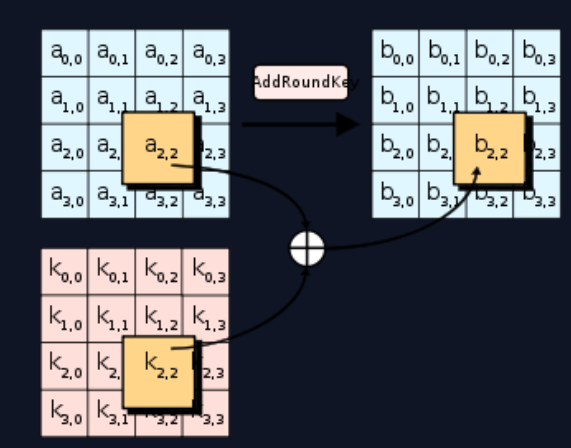

```
state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]

round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]


def add_round_key(s, k):
    ???


print(add_round_key(state, round_key))
```

In [6]:
def add_round_key(state, round_key):
    """
    Adds (XORs) the round key to the state.
    Each element in state matrix is XORed with corresponding element in round_key matrix
    """
    # Create a new matrix to store the result
    result = []
    for i in range(len(state)):
        row = []
        for j in range(len(state[0])):
            # XOR each element of state with corresponding element of round_key
            row.append(state[i][j] ^ round_key[i][j])
        result.append(row)
    return result

# Test with the given state and round_key
state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]

round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]

# To get the flag, combine with the previous matrix2bytes function
def matrix2bytes(matrix):
    return bytes(sum(matrix, []))

# Print the result
result = add_round_key(state, round_key)
print(matrix2bytes(result))


b'crypto{r0undk3y}'


________________________________________________________________
*F21*


The first step of each AES round is SubBytes. This involves taking each byte of the state matrix and substituting it for a different byte in a preset 16x16 lookup table. The lookup table is called a "Substitution box" or "S-box" for short, and can be perplexing at first sight. Let's break it down.

diagram showing Substitution

In 1945 American mathematician Claude Shannon published a groundbreaking paper on Information Theory. It identified "confusion" as an essential property of a secure cipher. "Confusion" means that the relationship between the ciphertext and the key should be as complex as possible. Given just a ciphertext, there should be no way to learn anything about the key.

If a cipher has poor confusion, it is possible to express a relationship between ciphertext, key, and plaintext as a linear function. For instance, in a Caesar cipher, ciphertext = plaintext + key. That's an obvious relation, which is easy to reverse. More complicated linear transformations can be solved using techniques like Gaussian elimination. Even low-degree polynomials, e.g. an equation like x^4 + 51x^3 + x, can be solved efficiently using algebraic methods. However, the higher the degree of a polynomial, generally the harder it becomes to solve – it can only be approximated by a larger and larger amount of linear functions.

The main purpose of the S-box is to transform the input in a way that is resistant to being approximated by linear functions. S-boxes are aiming for high non-linearity, and while AES's one is not perfect, it's pretty close. The fast lookup in an S-box is a shortcut for performing a very nonlinear function on the input bytes. This function involves taking the modular inverse in the Galois field 2**8 and then applying an affine transformation which has been tweaked for maximum confusion. The simplest way to express the function is through the following high-degree polynomial:

diagram showing S-Box equation

To make the S-box, the function has been calculated on all input values from 0x00 to 0xff and the outputs put in the lookup table.

Implement sub_bytes, send the state matrix through the inverse S-box and then convert it to bytes to get the flag.



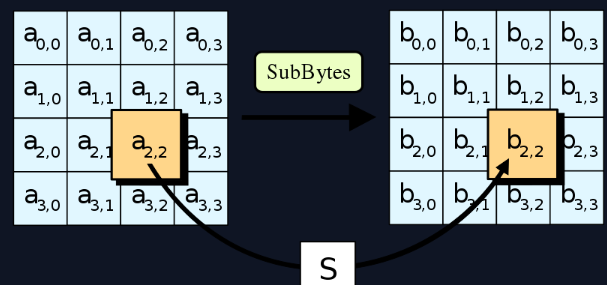

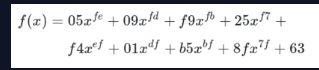 

```
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

state = [
    [251, 64, 182, 81],
    [146, 168, 33, 80],
    [199, 159, 195, 24],
    [64, 80, 182, 255],
]


def sub_bytes(s, sbox=s_box):
    ???


print(sub_bytes(state, sbox=inv_s_box))
```

In [11]:
s_box = (
 0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
 0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
 0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
 0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
 0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
 0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
 0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
 0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
 0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
 0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
 0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
 0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
 0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
 0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
 0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
 0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)
inv_s_box = (
 0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
 0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
 0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
 0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
 0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
 0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
 0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
 0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
 0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
 0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
 0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
 0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
 0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
 0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
 0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
 0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

state = [
    [251, 64, 182, 81],
    [146, 168, 33, 80],
    [199, 159, 195, 24],
    [64, 80, 182, 255],
]

def sub_bytes(s, sbox=s_box):
    """
    Applies the SubBytes transformation to the state matrix.

    Args:
        s (list of lists): The state matrix (4x4 list of integers).
        sbox (tuple): The substitution box (256-element tuple of integers).

    Returns:
        list of lists: The transformed state matrix.
    """
    for i in range(4):
        for j in range(4):
            s[i][j] = sbox[s[i][j]]
    return s

numerical_lists = sub_bytes(state, sbox=inv_s_box)
flag = ""

for sublist in numerical_lists:
  for code_point in sublist:
    flag += chr(code_point)

print(numerical_lists)
print(flag)



[[99, 114, 121, 112], [116, 111, 123, 108], [49, 110, 51, 52], [114, 108, 121, 125]]
crypto{l1n34rly}


____________________________________________________________________________

*F22*

We've seen how S-box substitution provides confusion. The other crucial property described by Shannon is "diffusion". This relates to how every part of a cipher's input should spread to every part of the output.

Substitution on its own creates non-linearity, however it doesn't distribute it over the entire state. Without diffusion, the same byte in the same position would get the same transformations applied to it each round. This would allow cryptanalysts to attack each byte position in the state matrix separately. We need to alternate substitutions by scrambling the state (in an invertible way) so that substitutions applied on one byte influence all other bytes in the state. Each input into the next S-box then becomes a function of multiple bytes, meaning that with every round the algebraic complexity of the system increases enormously.

An ideal amount of diffusion causes a change of one bit in the plaintext to lead to a change in statistically half the bits of the ciphertext. This desirable outcome is called the Avalanche effect.


The ShiftRows and MixColumns steps combine to achieve this. They work together to ensure every byte affects every other byte in the state within just two rounds.

ShiftRows is the most simple transformation in AES. It keeps the first row of the state matrix the same. The second row is shifted over one column to the left, wrapping around. The third row is shifted two columns, the fourth row by three. Wikipedia puts it nicely: "the importance of this step is to avoid the columns being encrypted independently, in which case AES degenerates into four independent block ciphers."

diagram showing ShiftRows

The diagram (and the AES specification) show the ShiftRows operation occuring in column-major notation. However, the sample code below uses row-major notation for the state matrix as it is more natural in Python. As long as the same notation is used each time the matrix is accessed, the final result is identical. Due to access patterns and cache behaviour, using one type of notation can lead to better performance.


MixColumns is more complex. It performs Matrix multiplication in Rijndael's Galois field between the columns of the state matrix and a preset matrix. Each single byte of each column therefore affects all the bytes of the resulting column. The implementation details are nuanced; this page and Wikipedia do a good job of covering them.

diagram showing MixColumns

We've provided code to perform MixColumns and the forward ShiftRows operation. After implementing inv_shift_rows, take the state, run inv_mix_columns on it, then inv_shift_rows, convert to bytes and you will have your flag.



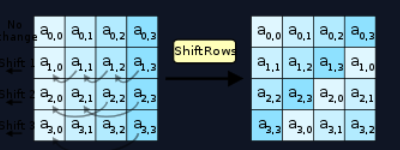

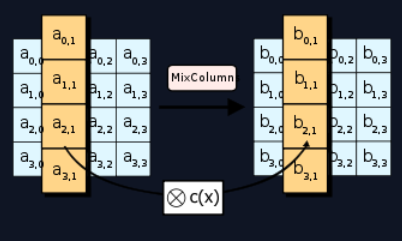


```

def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]


def inv_shift_rows(s):
    ???


# learned from http://cs.ucsb.edu/~koc/cs178/projects/JT/aes.c
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)


def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])


def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v

    mix_columns(s)


state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]

```

In [14]:
def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]

def inv_shift_rows(s):
    # Inverse shift for row 1 (right shift by 1)
    s[0][1], s[1][1], s[2][1], s[3][1] = s[3][1], s[0][1], s[1][1], s[2][1]
    # Inverse shift for row 2 (right shift by 2)
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    # Inverse shift for row 3 (right shift by 3)
    s[0][3], s[1][3], s[2][3], s[3][3] = s[1][3], s[2][3], s[3][3], s[0][3]

# learned from http://cs.ucsb.edu/~koc/cs178/projects/JT/aes.c
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)

def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)

def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])

def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v
    mix_columns(s)

def matrix2bytes(matrix):
    """Converts a 4x4 matrix into a 16-byte array."""
    return bytes(sum(matrix, []))

# Initial state
state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]

# Apply inverse operations
inv_mix_columns(state)
inv_shift_rows(state)

# Get the flag
flag = matrix2bytes(state)
print(flag)


b'crypto{d1ffUs3R}'


___________________________________________________________
*F23*

Apart from the KeyExpansion phase, we've sketched out all the components of AES. We've shown how SubBytes provides confusion and ShiftRows and MixColumns provide diffusion, and how these two properties work together to repeatedly circulate non-linear transformations over the state. Finally, AddRoundKey seeds the key into this substitution-permutation network, making the cipher a keyed permutation.

Decryption involves performing the steps described in the "Structure of AES" challenge in reverse, applying the inverse operations. Note that the KeyExpansion still needs to be run first, and the round keys will be used in reverse order. AddRoundKey and its inverse are identical as XOR has the self-inverse property.

We've provided the key expansion code, and ciphertext that's been properly encrypted by AES-128. Copy in all the building blocks you've coded so far, and complete the decrypt function that implements the steps shown in the diagram. The decrypted plaintext is the flag.

Yes, you can cheat on this challenge, but where's the fun in that?

The code used in these exercises has been taken from Bo Zhu's super simple Python AES implementation, so we've reproduced the license here.

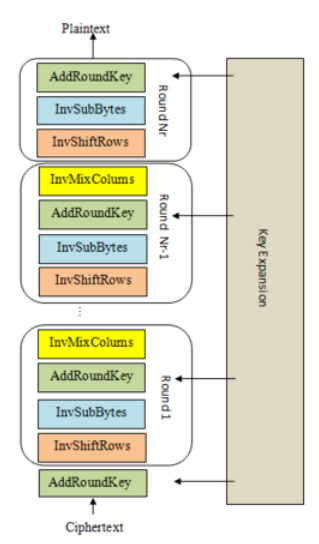

```
N_ROUNDS = 10

key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'



def expand_key(master_key):
    """
    Expands and returns a list of key matrices for the given master_key.
    """

    # Round constants https://en.wikipedia.org/wiki/AES_key_schedule#Round_constants
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )

    # Initialize round keys with raw key material.
    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4

    # Each iteration has exactly as many columns as the key material.
    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        # Copy previous word.
        word = list(key_columns[-1])

        # Perform schedule_core once every "row".
        if len(key_columns) % iteration_size == 0:
            # Circular shift.
            word.append(word.pop(0))
            # Map to S-BOX.
            word = [s_box[b] for b in word]
            # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            # Run word through S-box in the fourth iteration when using a
            # 256-bit key.
            word = [s_box[b] for b in word]

        # XOR with equivalent word from previous iteration.
        word = bytes(i^j for i, j in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)

    # Group key words in 4x4 byte matrices.
    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]


def decrypt(key, ciphertext):
    round_keys = expand_key(key) # Remember to start from the last round key and work backwards through them when decrypting

    # Convert ciphertext to state matrix

    # Initial add round key step

    for i in range(N_ROUNDS - 1, 0, -1):
        pass # Do round

    # Run final round (skips the InvMixColumns step)

    # Convert state matrix to plaintext

    return plaintext


# print(decrypt(key, ciphertext))
````



https://github.com/francisrstokes/githublog/blob/main/2022/6/15/rolling-your-own-crypto-aes.md


```
Copyright (C) 2012 Bo Zhu http://about.bozhu.me

Permission is hereby granted, free of charge, to any person obtaining a
copy of this software and associated documentation files (the "Software"),
to deal in the Software without restriction, including without limitation
the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
DEALINGS IN THE SOFTWARE.
```

In [15]:
N_ROUNDS = 10

key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'

def bytes2matrix(text):
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    return bytes(sum(matrix, []))

def add_round_key(state, round_key):
    for i in range(4):
        for j in range(4):
            state[i][j] ^= round_key[i][j]

def inv_shift_rows(state):
    state[0][1], state[1][1], state[2][1], state[3][1] = state[3][1], state[0][1], state[1][1], state[2][1]
    state[0][2], state[1][2], state[2][2], state[3][2] = state[2][2], state[3][2], state[0][2], state[1][2]
    state[0][3], state[1][3], state[2][3], state[3][3] = state[1][3], state[2][3], state[3][3], state[0][3]

def inv_sub_bytes(state):
    inv_s_box = (
        0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
        0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
        0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
        0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
        0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
        0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
        0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
        0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
        0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
        0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
        0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
        0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
        0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
        0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
        0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D
    )
    for i in range(4):
        for j in range(4):
            state[i][j] = inv_s_box[state[i][j]]

def mix_single_column(a):
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)

def mix_columns(state):
    for i in range(4):
        mix_single_column(state[i])

def inv_mix_columns(state):
    for i in range(4):
        u = xtime(xtime(state[i][0] ^ state[i][2]))
        v = xtime(xtime(state[i][1] ^ state[i][3]))
        state[i][0] ^= u
        state[i][1] ^= v
        state[i][2] ^= u
        state[i][3] ^= v
    mix_columns(state)

xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)

def expand_key(master_key):
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )
    s_box = (
        0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
        0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
        0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
        0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
        0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
        0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
        0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
        0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
        0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
        0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
        0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
        0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
        0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
        0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
        0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
        0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
    )

    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4

    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        word = list(key_columns[-1])

        if len(key_columns) % iteration_size == 0:
            word.append(word.pop(0))
            word = [s_box[b] for b in word]
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            word = [s_box[b] for b in word]

        # Fixed: Properly XOR the words
        word = list(a ^ b for a, b in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)

    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]

def decrypt(key, ciphertext):
    round_keys = expand_key(key)
    state = bytes2matrix(ciphertext)
    
    # Initial add round key
    add_round_key(state, round_keys[N_ROUNDS])
    
    # 9 rounds
    for i in range(N_ROUNDS - 1, 0, -1):
        inv_shift_rows(state)
        inv_sub_bytes(state)
        add_round_key(state, round_keys[i])
        inv_mix_columns(state)
    
    # Final round
    inv_shift_rows(state)
    inv_sub_bytes(state)
    add_round_key(state, round_keys[0])
    
    return matrix2bytes(state)

# Decrypt and print the flag
print(decrypt(key, ciphertext))


b'crypto{MYAES128}'


_________________________________________________________________
*F24*


Modes of Operation Starter
Description
The previous set of challenges showed how AES performs a keyed permutation on a block of data. In practice, we need to encrypt messages much longer than a single block. A mode of operation describes how to use a cipher like AES on longer messages.

All modes have serious weaknesses when used incorrectly. The challenges in this category take you to a different section of the website where you can interact with APIs and exploit those weaknesses. Get yourself acquainted with the interface and use it to take your next flag!

Help
This page offers a convenient way for you to interact with the challenge functions. You can also use GET requests to send and receive data directly from the listed routes/endpoints if you wish. For more information see the FAQ.

Your aim is to recover the FLAG value. Once you have it, submit it on the CryptoHack Symmetric Ciphers page.

```
from Crypto.Cipher import AES


KEY = ?
FLAG = ?


@chal.route('/block_cipher_starter/decrypt/<ciphertext>/')
def decrypt(ciphertext):
    ciphertext = bytes.fromhex(ciphertext)

    cipher = AES.new(KEY, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(ciphertext)
    except ValueError as e:
        return {"error": str(e)}

    return {"plaintext": decrypted.hex()}


@chal.route('/block_cipher_starter/encrypt_flag/')
def encrypt_flag():
    cipher = AES.new(KEY, AES.MODE_ECB)
    encrypted = cipher.encrypt(FLAG.encode())

    return {"ciphertext": encrypted.hex()}


```



In [18]:
!pip install pycryptodome 


from Crypto.Cipher import AES
import requests

# Base URL for the API
BASE_URL = "http://aes.cryptohack.org/block_cipher_starter"

# 1. First, get the encrypted flag
def get_encrypted_flag():
    url = f"{BASE_URL}/encrypt_flag/"
    r = requests.get(url)
    return r.json()["ciphertext"]

# 2. Then decrypt the ciphertext
def decrypt_ciphertext(ciphertext):
    url = f"{BASE_URL}/decrypt/{ciphertext}/"
    r = requests.get(url)
    return r.json()["plaintext"]

# 3. Main function to get the flag
def get_flag():
    # Get the encrypted flag
    encrypted_flag = get_encrypted_flag()
    print(f"Encrypted flag: {encrypted_flag}")
    
    # Decrypt it
    decrypted_hex = decrypt_ciphertext(encrypted_flag)
    print(f"Decrypted hex: {decrypted_hex}")
    
    # Convert hex to ASCII
    flag = bytes.fromhex(decrypted_hex).decode()
    print(f"Flag: {flag}")
    
    return flag

# Run the solution
flag = get_flag()


^C
Encrypted flag: a3c22d1bfcccd351b995f478a962da376a2cb1620cfda8c02aa6befcda831698
Decrypted hex: 63727970746f7b626c30636b5f633170683372355f3472335f663435375f217d
Flag: crypto{bl0ck_c1ph3r5_4r3_f457_!}
